# Crop Data - Decision Tree Regressor

We utilized a dataset encompassing a wealth of information on crop production from diverse regions worldwide. The dataset encapsulates pivotal variables that could sway crop yields, encompassing the crop type, cultivation area, the country and specific region of cultivation, among others. Our objective was to harness these variables to predict the crop production output, quantified in tonnes.

To achieve this, we deployed a Decision Tree Regressor, a machine learning model proficient in deducing decision rules from data features to predict outcomes. Our focal point was to predict the production output based on a suite of input features, blending both categorical (such as country and crop type) and numerical variables (like the harvested area).

## 1. Import and read the data

Import all the required libraries :

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pickle

The following command imports the CSV dataset using Pandas:

In [2]:
crop_data = pd.read_csv('crop.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'crop.csv'

## 2. Data processing

In this step, we are preparing our categorical variables for the machine learning model. Since most models work with numerical data, we need to convert our categorical columns into a numerical format. Specifically, we will perform label encoding on the admin1 column, which will assign a unique integer to each category of the column. For the country and crop columns, we will apply one-hot encoding. This will create new columns for each unique category in the original columns with binary values: a '1' indicates the presence of the category and a '0' indicates its absence. This encoding method is particularly useful for nominal data where no order or priority of the categories is implied.

In [ ]:




from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# # Initialize a label encoder for the 'admin1' column
label_encoder = LabelEncoder()
crop_data['admin1_encoded'] = label_encoder.fit_transform(crop_data['admin1'])


# Perform one-hot encoding on the 'age_category' column
encoded_age_category_df = pd.get_dummies(crop_data['country'], prefix='country')
encoded_age_category_df = encoded_age_category_df.astype(int)
encoded_df = pd.get_dummies(crop_data['crop'], prefix='crop')
encoded_df = encoded_age_category_df.astype(int)
# Concatenate the original dataframe with the encoded age category columns
crop_data = pd.concat([crop_data, encoded_age_category_df,encoded_df], axis=1)

# Drop the original 'age_category' column
crop_data.drop('crop', axis=1,inplace=True)
crop_data.drop('country', axis=1,inplace=True)
crop_data.drop('admin1', axis=1,inplace=True)



In [ ]:
crop_data

,Unnamed: 0,Harvest_year,yield(tonnes/ha),production (tonnes),hectares (ha),admin1_encoded,country_Argentina,country_Australia,country_Austria,country_Belgium,...,country_Finland,country_France,country_India,country_Indonesia,country_Italy,country_Mexico,country_Morocco,country_South Africa,country_Spain,country_United States
0,0,1930,1.614035,1.894187e+04,11735.72,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1931,1.614035,1.894187e+04,11735.72,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1932,1.614035,1.894187e+04,11735.72,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1933,1.614035,1.894187e+04,11735.72,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1934,1.614035,1.894187e+04,11735.72,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,13931,2013,1.828279,9.874543e+06,5401005.00,79,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13724,13932,2014,1.454291,6.937687e+06,4770494.00,79,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13725,13933,2015,2.140673,1.168910e+07,5460480.00,79,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13726,13934,2016,0.936153,3.561589e+06,3804496.00,79,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 3. Data splicing

In the data splicing step, we divide our dataset into two parts: the training set and the test set. The training set is used by the machine learning algorithm to learn the patterns in the data, while the test set is used to evaluate how well the model has learned these patterns and how it performs on data it has not seen before. It's crucial to keep these sets separate to prevent information leakage and ensure that our model's performance metrics are a true reflection of its ability to generalize to new data.

The common split ratio is 80% for training and 20% for testing, but this can vary depending on the size and specifics of the dataset. We'll also set a random state for reproducibility, so that our results can be consistently replicated.

In [ ]:
from sklearn.model_selection import train_test_split

# Specify the target variable name
target_column = 'production (tonnes)'  # or 'yield(tonnes/ha)' depending on your goal

# Select all columns except the target to be features
features = crop_data.drop(columns=[target_column, 'Unnamed: 0'])  # Excluding 'Unnamed: 0' as it's likely an index

# Now 'features' contains all columns except the target and the index

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features, crop_data[target_column], test_size=0.2, random_state=42
)


In [ ]:
print(X_train) 

       Harvest_year  yield(tonnes/ha)  hectares (ha)  admin1_encoded  \
6885           1951          1.604600        76828.0              27   
6961           1939          1.340680         1706.0              28   
9058           2012          8.222733       404680.0              51   
866            2004          3.962600       162634.0              74   
6904           1970          2.980000        51605.0              27   
...             ...               ...            ...             ...   
5191           2017         10.482416        32374.4               7   
13418          1972          1.932103       916100.0             126   
5390           1952          2.512281         2850.0              10   
860            1998          4.215062       241734.0              74   
7270           1984          4.828767         7300.0              31   

       country_Argentina  country_Australia  country_Austria  country_Belgium  \
6885                   0                  0           

In [ ]:
print(y_train) 

6885     1.232782e+05
6961     2.287200e+03
9058     3.327576e+06
866      6.444535e+05
6904     1.537829e+05
             ...     
5191     3.393619e+05
13418    1.770000e+06
5390     7.160000e+03
860      1.018924e+06
7270     3.525000e+04
Name: production (tonnes), Length: 10982, dtype: float64


Let's plot the train (green dots) and test (red dots) data.

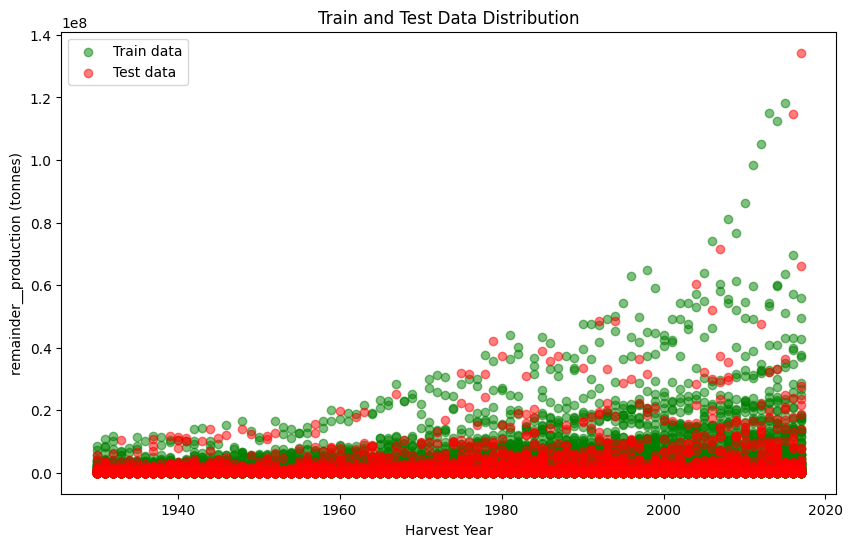

In [ ]:
# Check if 'Harvest_year' is in our columns to proceed with plotting

# Extracting 'Harvest_year' from the features for plotting
X_train_plot = X_train['Harvest_year'].values.reshape(-1, 1)
X_test_plot = X_test['Harvest_year'].values.reshape(-1, 1)

    # Let's proceed with plotting
plt.figure(figsize=(10, 6))

    # Plot training data in green
plt.scatter(X_train_plot, y_train, color='green', label='Train data', alpha=0.5)

    # Plot test data in red
plt.scatter(X_test_plot, y_test, color='red', label='Test data', alpha=0.5)

    # Add titles and labels
plt.title('Train and Test Data Distribution')
plt.xlabel('Harvest Year')
plt.ylabel('remainder__production (tonnes)')
plt.legend()

    # Show the plot
plt.show()


## 5. Train our model

In this section, we will be training a Decision Tree Regressor model on our crop dataset. A Decision Tree Regressor makes decisions based on the values of the input features by learning a series of rules from the training data. This model is particularly well-suited for complex datasets with non-linear relationships and interactions between features.

In [ ]:


# Initialize the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)



## 6. Predictions

Now that we have trained our model, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the MaxTemp.

In [ ]:
y_pred = tree_model.predict(X_test)

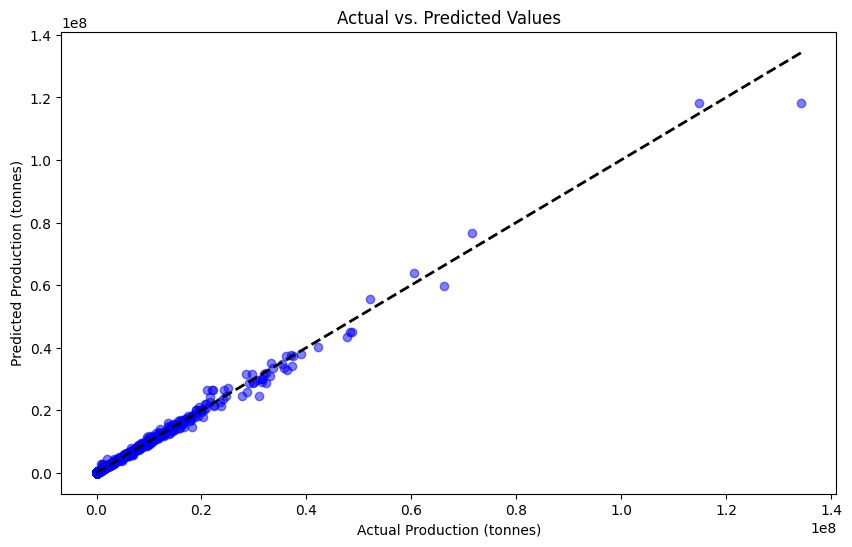

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Plot a diagonal line representing the 'perfect prediction' line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Production (tonnes)')
plt.ylabel('Predicted Production (tonnes)')
plt.show()


In [ ]:
# Now let's create the example output
example_data = {
    'Actual Production (tonnes)': y_test[:5].values,
    'Predicted Production (tonnes)': y_pred[:5]
}

example_df = pd.DataFrame(example_data)
example_df = example_df.reset_index(drop=True)  # Resetting the index for clean printing
example_df['Predicted Production (tonnes)'] = example_df['Predicted Production (tonnes)'].round(1)  # Round predictions

# Print examples in the requested format
example_output = example_df.apply(lambda row: f"Actual Production: {int(row['Actual Production (tonnes)'])} tonnes | "
                                              f"Predicted Production: {row['Predicted Production (tonnes)']} tonnes", axis=1)

example_output_list = example_output.tolist()
example_output_list

C:\Users\hamma\AppData\Local\Temp\ipykernel_14904\2519592353.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  'Actual Production (tonnes)': y_test[:5].values,


['Actual Production: 2825000 tonnes | Predicted Production: 2782000.0 tonnes',
 'Actual Production: 501000 tonnes | Predicted Production: 501000.0 tonnes',
 'Actual Production: 50 tonnes | Predicted Production: 54.0 tonnes',
 'Actual Production: 410000 tonnes | Predicted Production: 408758.4 tonnes',
 'Actual Production: 9000000 tonnes | Predicted Production: 8540000.0 tonnes']

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used.

In [ ]:
from sklearn import metrics

# compute performance metrics
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 119488.0
Mean squared error = 285489070815.47
Root Mean Squared Error = 534311.77
R2 score = 0.99


# 7. Saving Model


In [ ]:
# Assuming `model` is your trained model object
with open('DecisionTreeR_Crop.pkl', 'wb') as file:
    pickle.dump(tree_model, file)


**Conclusion**

Overall, these metrics suggest that the Decision Trees Regressor is performing extremely well on this dataset. The R2 score is particularly high, and the MAPE is very low, indicating that the model is making predictions that are very close to the actual data.